In [7]:
data = Import["RedBipartita_Crimenes.csv", "CSV"];

In [8]:
data = Rest[data];

Graph[<833>, <1522>]
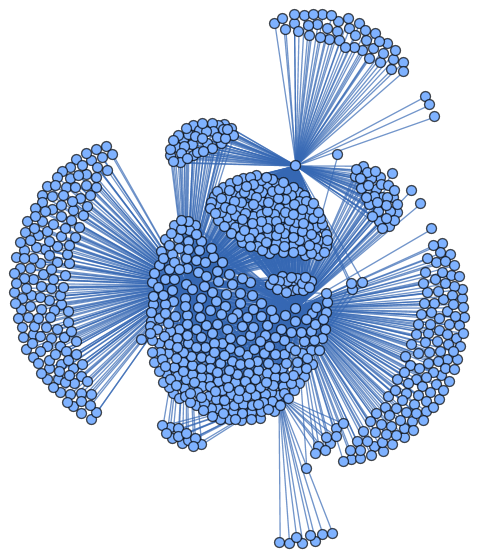

In [9]:
graph = Graph[UndirectedEdge @@@ data]

In [6]:
Length[ConnectedComponents[graph]]

1

In [37]:
partition[g_] := Module[{vertex, u, v, c, list},
  vertex = VertexList[g]; 
  u = {};
  v = {};
  c = Complement[vertex, Join[u, v]]; (* Vértices que no están en u ni en v *)
  
  While[c != {}, (* Mientras haya vértices no asignados *)
    list = GraphDistance[g, c[[1]]]; (* Distancias de c[[1]] a todos los vértices *)
    
    (* Iteramos sobre la lista de distancias *)
    For[j = 1, j <= Length[list], j++,
      If[NumericQ[list[[j]]], (* Verificamos si la distancia es numérica *)
        If[EvenQ[list[[j]]], 
          AppendTo[u, vertex[[j]]], (* Si la distancia es par, lo asignamos a u *)
          AppendTo[v, vertex[[j]]]  (* Si la distancia es impar, lo asignamos a v *)
        ]
      ]
    ];
    
    c = Complement[vertex, Join[u, v]] (* Actualizamos c con los vértices no asignados *)
  ];
  
  {u, v} (* Devolvemos los dos conjuntos de vértices *)
]

In [38]:
projections[graph_, setUorV_] :=
  Module[{set, projectedEdges},
    set = Switch[setUorV,
      U, partition[graph][[2]],
      V, partition[graph][[1]]
    ];
    projectedEdges = 
      DeleteDuplicates@Flatten[
        Subsets[#, {2}] & /@ (AdjacencyList[graph, #] & /@ set),
        1
      ];
    Graph[Union@Flatten[projectedEdges], UndirectedEdge @@@ projectedEdges]
  ];

Graph[<829>, <281960>]
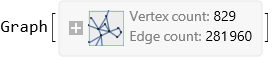

In [39]:
graphU = projections[graph, U]

In [47]:
list = AdjacencyList[graph, #] & /@ partition[graph][[2]];
list1 = list[[4]];
Length[AdjacencyList[graph, "Suspect"]]
Length[AdjacencyList[graph, "Victim Suspect"]]
Length[AdjacencyList[graph, "Victim"]]
Length[AdjacencyList[graph, "Witness"]]

615
61
577
269

In [53]:
list1[[1]]

AlexanderNolan

In [54]:
AdjacencyList[graph, "AlexanderNolan"]

{Suspect, Victim, Witness, Victim Suspect}

In [32]:
Length[AdjacencyList[graphU, "AndrewsSally"]]

633